In [58]:
import numpy as np
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

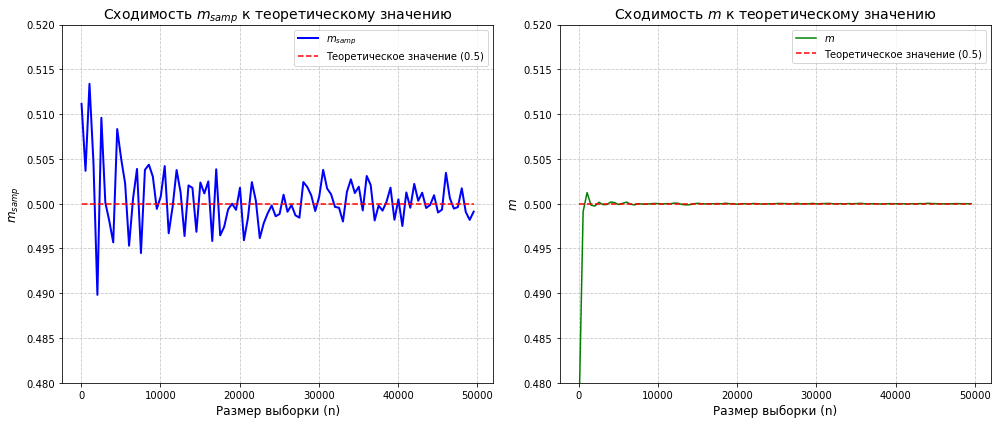

In [60]:
# Задание 1.1
a = 0
b = 1
m_samp = []
m = []
nn = np.arange(50, 50000, 500)

for i in nn:
    X = np.random.uniform(a, b, size=i)
    m_samp.append(np.mean(X))# Выборочное среднее
    m.append((np.min(X) + np.max(X)) / 2)  

plt.figure(figsize=(14, 6))

# График для m_samp
plt.subplot(1, 2, 1)
plt.plot(nn, m_samp, label='$m_{samp}$', color='blue', linewidth=2)
plt.hlines(0.5, min(nn), max(nn), color='red', linestyle='--', label='Теоретическое значение (0.5)')
plt.title('Сходимость $m_{samp}$ к теоретическому значению', fontsize=14)
plt.xlabel('Размер выборки (n)', fontsize=12)
plt.ylabel('$m_{samp}$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.48, 0.52)  
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn, m, label='$m$', color='green')
plt.hlines(0.5, min(nn), max(nn), color='red', linestyle='--', label='Теоретическое значение (0.5)')
plt.title('Сходимость $m$ к теоретическому значению', fontsize=14)
plt.xlabel('Размер выборки (n)', fontsize=12)
plt.ylabel('$m$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.48, 0.52)  
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
# оценки состоятельны так как стремятся к своим теоретическим значениям при стремлении n к бесконечености

In [62]:
# Задание 1.2
a = 0
b = 1
m_samp = []
m = []
nn = np.arange(50, 50000, 500)

for i in nn:
    X = np.random.uniform(a, b, size=i)
    m_samp.append(np.mean(X))
    m.append((np.min(X) + np.max(X)) / 2)  

mean_m_samp = np.mean(m_samp)
mean_m = np.mean(m)

teor_mean = 0.5

print(f"Среднее значение оценки X̄: {mean_m_samp}")
print(f"Среднее значение оценки m̂: {mean_m}")
print(f"Истинное значение математического ожидания: {teor_mean}")

# Проверка несмещённости
if np.isclose(mean_m_samp, teor_mean, atol=1e-2):
    print("Оценка X̄ является несмещённой.")
else:
    print("Оценка X̄ является смещённой.")

if np.isclose(mean_m, teor_mean, atol=1e-2):
    print("Оценка m̂ является несмещённой.")
else:
    print("Оценка m̂ является смещённой.")

Среднее значение оценки X̄: 0.4999056459561586
Среднее значение оценки m̂: 0.499984912291513
Истинное значение математического ожидания: 0.5
Оценка X̄ является несмещённой.
Оценка m̂ является несмещённой.


In [66]:
#т.к среднее оценок очень близо к своему теоретическому 
#значению следовательно они являются несмещенными

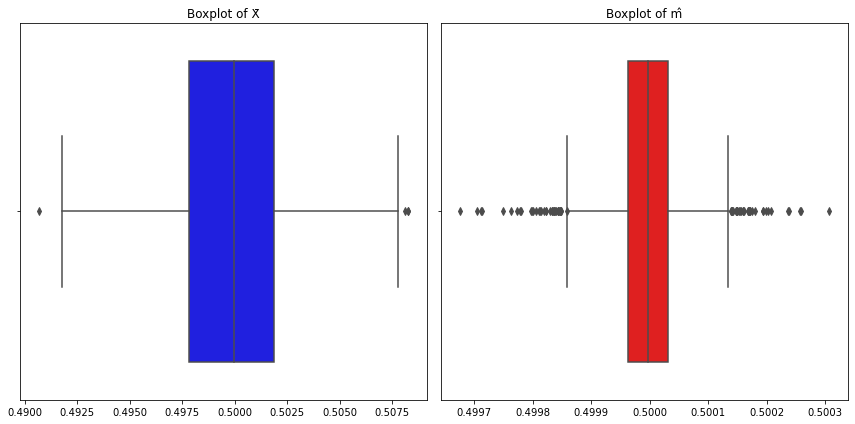

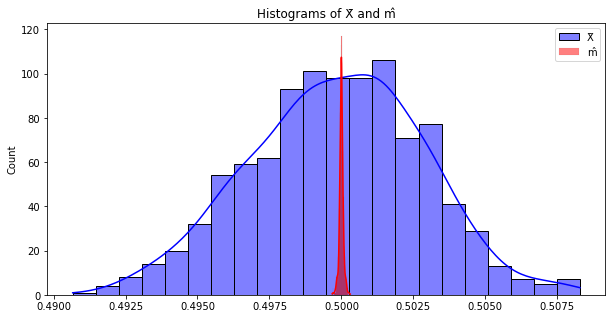

Дисперсия X̄: 9.082646623461595e-06
Дисперсия m̂: 4.937654379047561e-09
Оценка m̂ более эффективна, чем оценка X̄.


In [68]:
#1.3

a = 0
b = 1
n = 10000  
N = 1000  

# Генерация выборок
m_samp = []
m = []

for i in range(N):
    X = np.random.uniform(a, b, size=n)
    m_samp.append(np.mean(X))
    m.append((np.min(X) + np.max(X)) / 2)

# Визуализация с помощью боксилотов
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=m_samp, color="blue")
plt.title('Boxplot of X̄')

plt.subplot(1, 2, 2)
sns.boxplot(x=m, color="red")
plt.title('Boxplot of m̂')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(m_samp, kde=True, color="blue", label='X̄')
sns.histplot(m, kde=True, color="red", label='m̂')
plt.legend()
plt.title('Histograms of X̄ and m̂')
plt.show()

var_X_bar = np.var(m_samp)
var_m = np.var(m)

print(f"Дисперсия X̄: {var_X_bar}")
print(f"Дисперсия m̂: {var_m}")

# Сравнение эффективности
if var_X_bar < var_m:
    print("Оценка X̄ более эффективна, чем оценка m̂.")
else:
    print("Оценка m̂ более эффективна, чем оценка X̄.")

In [69]:
#Так как дисперсия m с крышечкой меньше чем
#дисперсия Х с черточкой следовательно m с крышечкой эффективнее

`Задание 2`

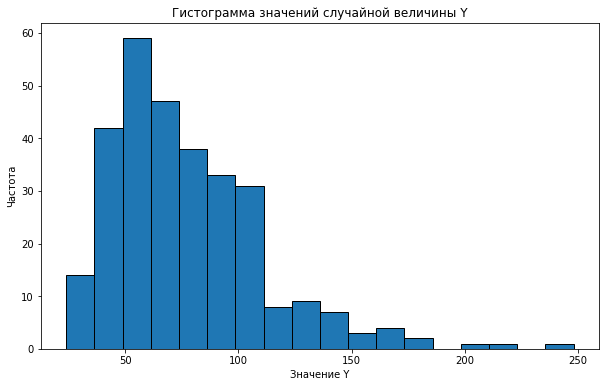

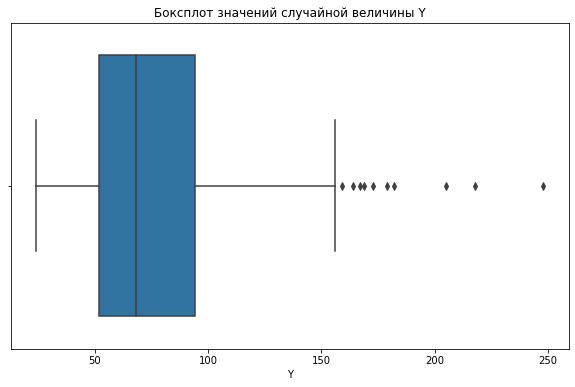

Характеристики через sts.describe: 
 DescribeResult(nobs=300, minmax=(24, 248), mean=77.09666666666666, variance=1178.4220624303232, skewness=1.4283653982002626, kurtosis=3.0608475138081044)
Математическое ожидание: 77.09666666666666
Медиана: 68.0
Дисперсия: 1174.493988888889
Коэффициент асимметрии: 1.4283653982002626
Коэффициент эксцесса: 3.0608475138081044


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


Y = []
elems = [0, 1, 2, 3, 4, 5, 6]
prob = [1/6] * 6 
last = 0
tabl_smezh = np.full((7, 7), False)
count = 0

while len(Y) != 300:
    # Выбор случайного элемента, исключая last
    rand_elem = np.random.choice([i for i in elems if i != last], p=prob)
    
    # Обновление таблицы смежности
    if ((last+1)% 7 != rand_elem)  and  ((last-1)%7 != rand_elem): #не учитываем стороны
        tabl_smezh[last][rand_elem] = True
        tabl_smezh[rand_elem][last] = True
    
    if np.sum(tabl_smezh) == 42-14:   #раньше учитывал стороны как диагонали, исправил это
        Y.append(count)
        count = 0
        tabl_smezh = np.full((7, 7), False)  # Сброс таблицы смежности
    else:
        count += 1
    

    last = rand_elem

#print(Y)

# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(Y, bins='sqrt', edgecolor='black')
plt.title('Гистограмма значений случайной величины Y')
plt.xlabel('Значение Y')
plt.ylabel('Частота')
plt.show()

# Боксплот
plt.figure(figsize=(10, 6))
sns.boxplot(x=Y)  
plt.title('Боксплот значений случайной величины Y')
plt.xlabel('Y')
plt.show()

result = sts.describe(Y)
print(f'Характеристики через sts.describe: \n {result}')
# Оценка характеристик
mean_Y = np.mean(Y)
print(f"Математическое ожидание: {mean_Y}")

median_Y = np.median(Y)
print(f"Медиана: {median_Y}")

var_Y = np.var(Y)
print(f"Дисперсия: {var_Y}")

skew_Y = skew(Y)
print(f"Коэффициент асимметрии: {skew_Y}")

kurtosis_Y = kurtosis(Y)
print(f"Коэффициент эксцесса: {kurtosis_Y}")